In [13]:
import pandas as pd

In [15]:
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('male_players.csv', low_memory=False)
players = df[['short_name', 'age', 'overall', 'potential', 'club_name', 'nationality_name',
              'player_positions', 'height_cm', 'weight_kg', 'value_eur', 'wage_eur']]
players = players.dropna()


In [25]:
#### TOP PLAYER

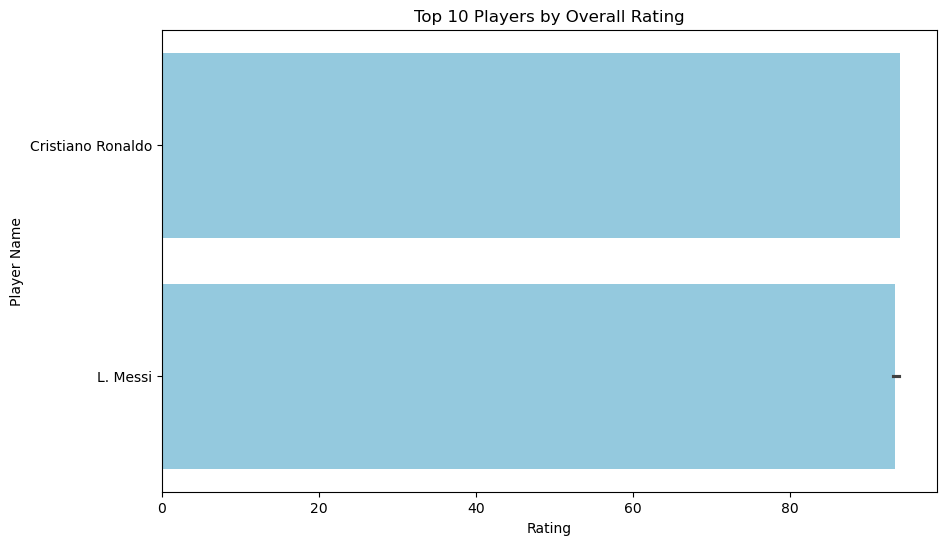

In [31]:
top_players = players.sort_values(by='overall', ascending=False)
top_players = top_players.drop_duplicates(subset='short_name', keep='first').head(10)
top_players = players.sort_values(by='overall', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='overall', y='short_name', data=top_players, color='skyblue')
plt.title('Top 10 Players by Overall Rating')
plt.xlabel('Rating')
plt.ylabel('Player Name')
plt.show()

In [33]:
#### TOP CLUB

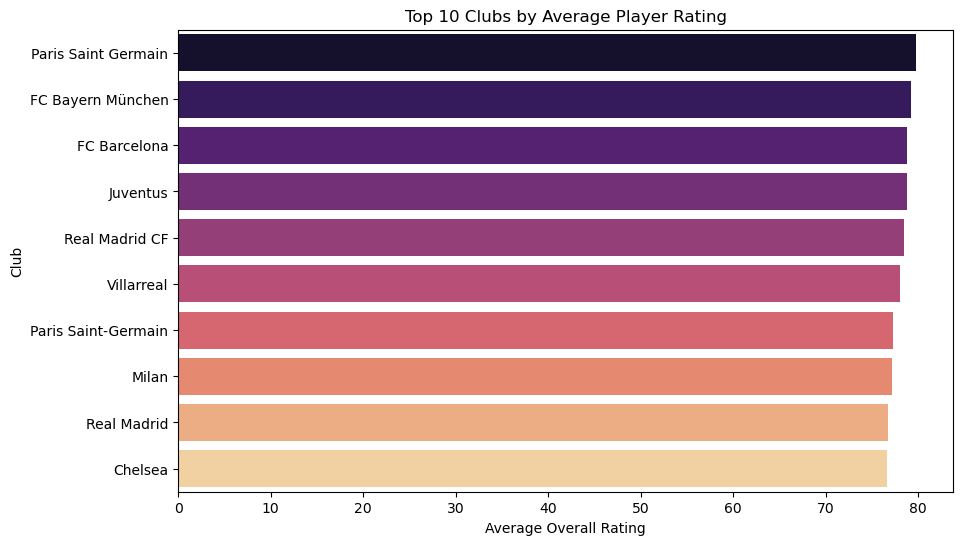

In [37]:
top_clubs = players.groupby('club_name')['overall'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_clubs.values, y=top_clubs.index, hue=top_clubs.index, palette='magma', legend=False)
plt.title('Top 10 Clubs by Average Player Rating')
plt.xlabel('Average Overall Rating')
plt.ylabel('Club')
plt.show()

In [39]:
# Get primary position (first listed)

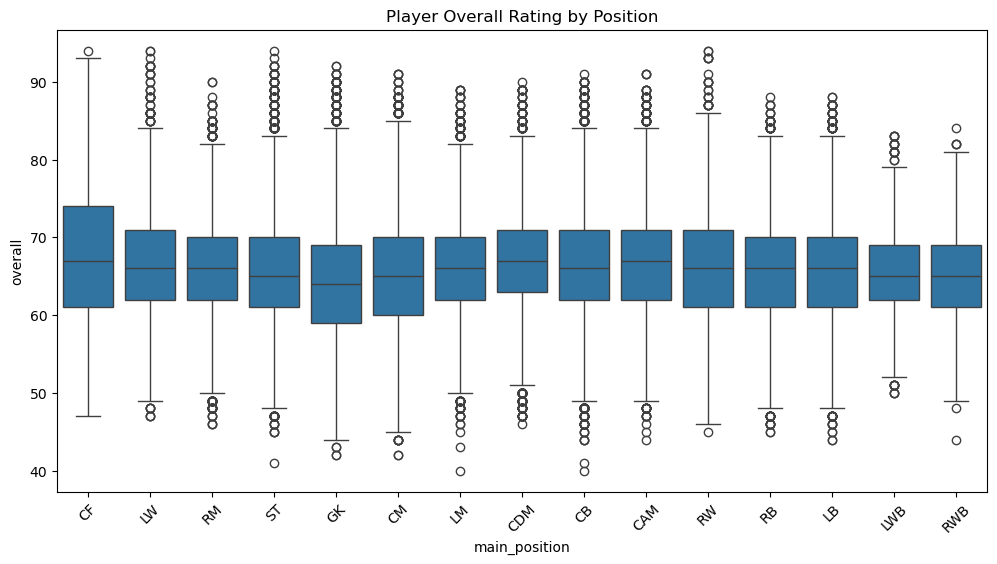

In [41]:
players['main_position'] = players['player_positions'].apply(lambda x: x.split(',')[0])
plt.figure(figsize=(12,6))
sns.boxplot(x='main_position', y='overall', data=players)
plt.title('Player Overall Rating by Position')
plt.xticks(rotation=45)
plt.show()